In [ ]:
!pip install -q gradio
import gradio as gr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import display, Image
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 10.8 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/startup data.csv")
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:

print("Dataset Shape (Rows, Column) : ",df.shape)
print("Size of Dataset = ",df.size)

Dataset Shape (Rows, Column) :  (923, 49)
Size of Dataset =  45227


In [ ]:
print("Columns : \n",df.columns)


Columns : 
 Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


df.info()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.describe()


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,NaN,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,CA,advertising,c:21343,acquired
919,MA,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,MA,security,c:41747,closed
920,CA,94089,c:31549,Sunnyvale,NaN,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,CA,biotech,c:31549,closed
921,CA,94404,c:33198,San Francisco,NaN,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,CA,software,c:33198,acquired


In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,37.740594,-122.376471,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,721,42.504817,-71.195611,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,557,37.408261,-122.015920,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,589,37.556732,-122.288378,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


In [ ]:
print(df.isnull().sum())


Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
print(df.isna().sum())


Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
columns=df.columns
d_c1=[]
for i in columns:
  df1=df[i].isnull().sum()
  r,c=df.shape
  val=(df1/r)*100
  if val >= 50:
    d_c1.append(i)

print(d_c1)

['Unnamed: 6', 'closed_at']


In [ ]:
df.drop(['Unnamed: 6','closed_at'],axis=1,inplace=True)


In [ ]:
mean_value1=df['age_first_milestone_year'].mean()
mean_value2=df['age_last_milestone_year'].mean()
df["age_first_milestone_year"].fillna(value=mean_value1,inplace=True)
df["age_last_milestone_year"].fillna(value=mean_value2,inplace=True)

In [ ]:
n=df[df['state_code.1'].isna()==True].index.item()
df.drop(n,axis=0,inplace=True)

In [ ]:
print(df.isnull().sum())


Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommer

In [ ]:
print(df.isna().sum())


Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommer

In [ ]:
df[df.duplicated()]


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


In [ ]:
num_columns=df_num.columns
print(num_columns)

Index(['Unnamed: 0', 'latitude', 'longitude', 'labels',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')


In [ ]:

for a in range(len(num_columns)):
  if num_columns[a]=="latitude" or num_columns[a]=="longitude":
    pass
  else:
    print("Is there any negative value in '{}' column : {} ".
          format(num_columns[a],(df[num_columns[a]]<0).any()))

Is there any negative value in 'Unnamed: 0' column : False 
Is there any negative value in 'labels' column : False 
Is there any negative value in 'age_first_funding_year' column : True 
Is there any negative value in 'age_last_funding_year' column : True 
Is there any negative value in 'age_first_milestone_year' column : True 
Is there any negative value in 'age_last_milestone_year' column : True 
Is there any negative value in 'relationships' column : False 
Is there any negative value in 'funding_rounds' column : False 
Is there any negative value in 'funding_total_usd' column : False 
Is there any negative value in 'milestones' column : False 
Is there any negative value in 'is_CA' column : False 
Is there any negative value in 'is_NY' column : False 
Is there any negative value in 'is_MA' column : False 
Is there any negative value in 'is_TX' column : False 
Is there any negative value in 'is_otherstate' column : False 
Is there any negative value in 'is_software' column : False 


In [ ]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [ ]:
for a in range(len(num_columns)):
  if num_columns[a]=="latitude" or num_columns[a]=="longitude":
    pass
  else:
    print("Is there any negative value in '{}' column : {} ".
          format(num_columns[a],(df[num_columns[a]]<0).any()))


Is there any negative value in 'Unnamed: 0' column : False 
Is there any negative value in 'labels' column : False 
Is there any negative value in 'age_first_funding_year' column : False 
Is there any negative value in 'age_last_funding_year' column : False 
Is there any negative value in 'age_first_milestone_year' column : False 
Is there any negative value in 'age_last_milestone_year' column : False 
Is there any negative value in 'relationships' column : False 
Is there any negative value in 'funding_rounds' column : False 
Is there any negative value in 'funding_total_usd' column : False 
Is there any negative value in 'milestones' column : False 
Is there any negative value in 'is_CA' column : False 
Is there any negative value in 'is_NY' column : False 
Is there any negative value in 'is_MA' column : False 
Is there any negative value in 'is_TX' column : False 
Is there any negative value in 'is_otherstate' column : False 
Is there any negative value in 'is_software' column : Fal

In [ ]:

df['status'] = df['status'].astype('category')
df['status'].replace(['acquired','closed'],[1, 0], inplace=True)
df['status']


,status
0,1
1,1
2,1
3,1
4,0
...,...
918,1
919,0
920,0
921,1


In [ ]:
df['status'] = df['status'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 922
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                839 non-null    int64  
 1   state_code                839 non-null    object 
 2   latitude                  839 non-null    float64
 3   longitude                 839 non-null    float64
 4   zip_code                  839 non-null    object 
 5   id                        839 non-null    object 
 6   city                      839 non-null    object 
 7   name                      839 non-null    object 
 8   labels                    839 non-null    int64  
 9   founded_at                839 non-null    object 
 10  first_funding_at          839 non-null    object 
 11  last_funding_at           839 non-null    object 
 12  age_first_funding_year    839 non-null    float64
 13  age_last_funding_year     839 non-null    float64
 14  age_first_miles

In [ ]:
df.drop(['labels','state_code.1', ],axis=1, inplace=True)


In [ ]:

df_cat1=df.select_dtypes(include='object')
df_cat1


,state_code,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,category_code,object_id
0,CA,92101,c:6669,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,music,c:6669
1,CA,95032,c:16283,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,enterprise,c:16283
2,CA,92121,c:65620,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,web,c:65620
3,CA,95014,c:42668,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,software,c:42668
4,CA,94105,c:65806,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,games_video,c:65806
...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,CoTweet,1/1/2009,7/9/2009,7/9/2009,advertising,c:21343
919,MA,1803,c:41747,Burlington,Reef Point Systems,1/1/1998,4/1/2005,3/23/2007,security,c:41747
920,CA,94089,c:31549,Sunnyvale,Paracor Medical,1/1/1999,6/29/2007,6/29/2007,biotech,c:31549
921,CA,94404,c:33198,San Francisco,Causata,1/1/2009,10/5/2009,11/1/2011,software,c:33198


In [ ]:
df_cat1.nunique()


,0
state_code,35
zip_code,359
id,838
city,210
name,838
founded_at,189
first_funding_at,550
last_funding_at,640
category_code,35
object_id,838


In [ ]:
df.drop(['id','name','object_id' ],axis=1, inplace=True)


In [ ]:

numeric1=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num1=df.select_dtypes(include=numeric1)
df_num1

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,204,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,1001,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,738,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,1002,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,37.740594,-122.376471,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1
919,721,42.504817,-71.195611,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0
920,557,37.408261,-122.015920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0
921,589,37.556732,-122.288378,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1


In [ ]:
df_num1.nunique()


,0
Unnamed: 0,839
latitude,599
longitude,598
age_first_funding_year,572
age_last_funding_year,697
age_first_milestone_year,410
age_last_milestone_year,522
relationships,38
funding_rounds,9
funding_total_usd,467


In [ ]:
df.drop(['Unnamed: 0' ],axis=1, inplace=True)


In [ ]:
df.shape


(839, 41)

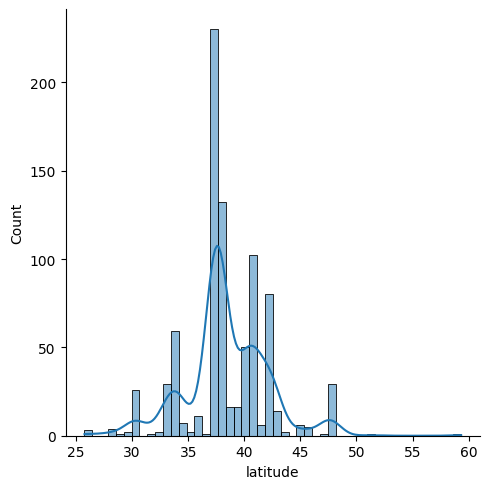

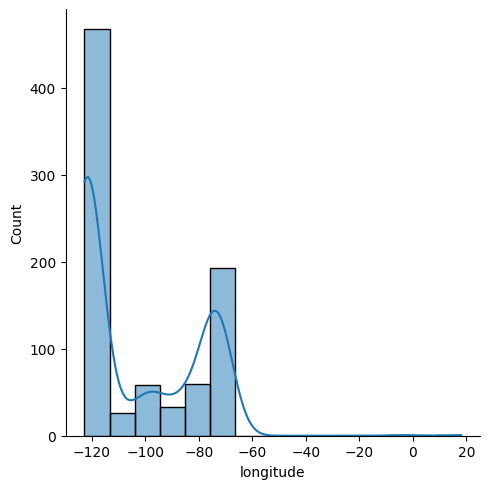

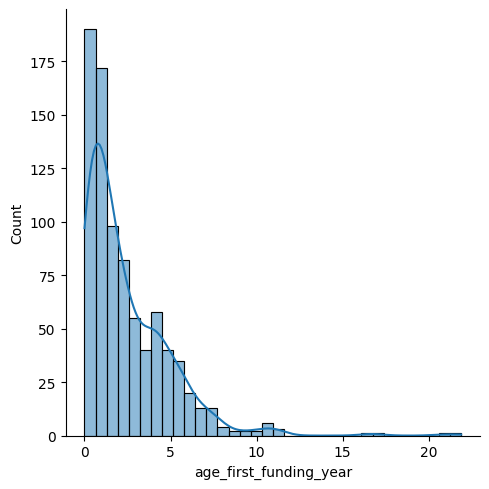

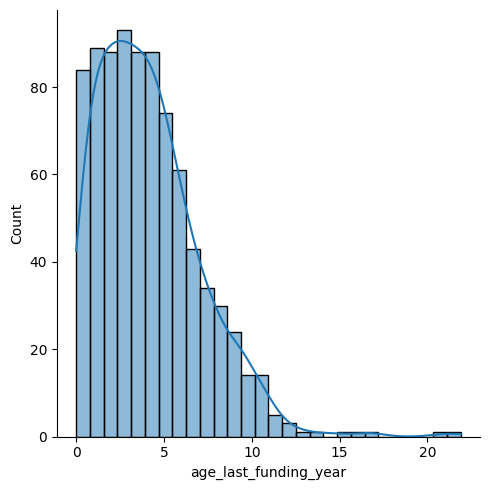

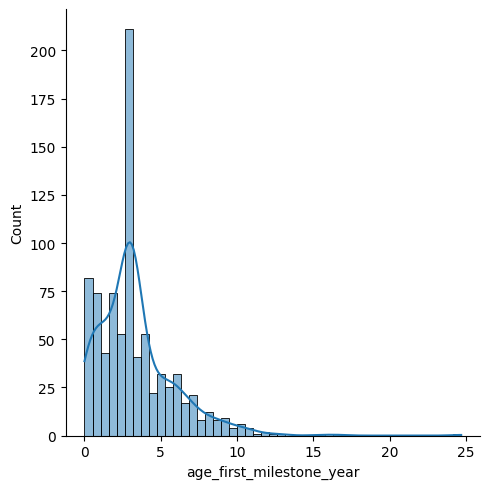

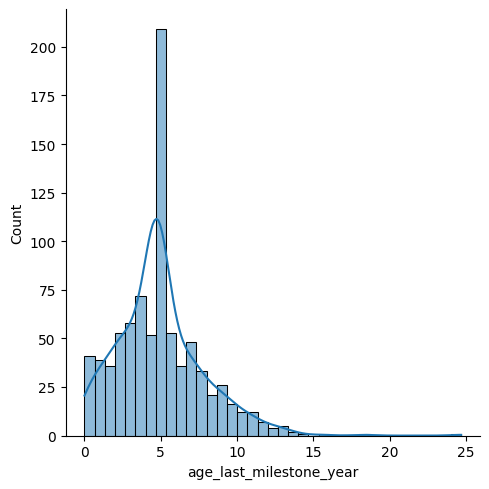

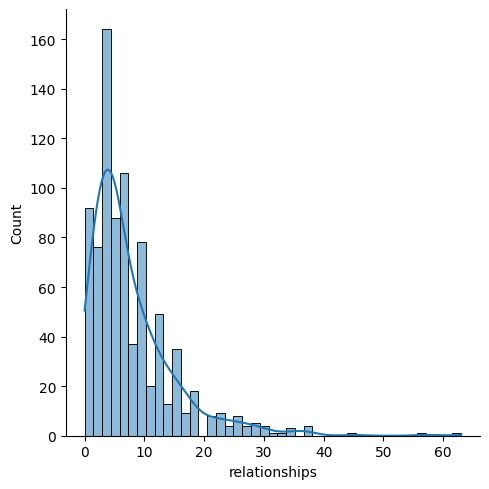

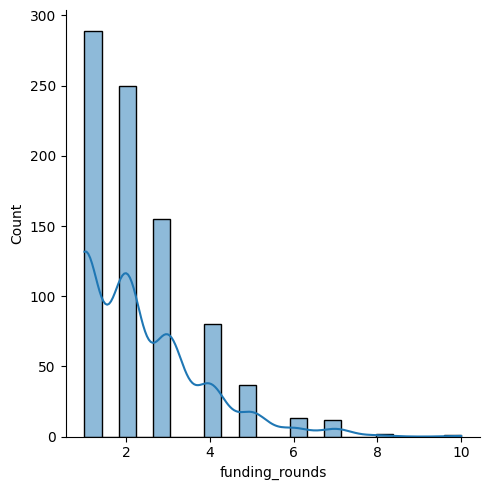

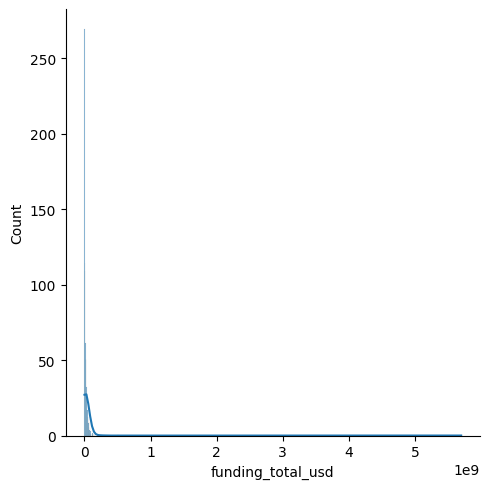

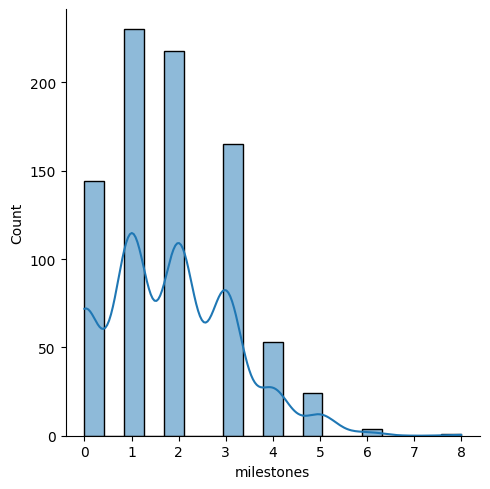

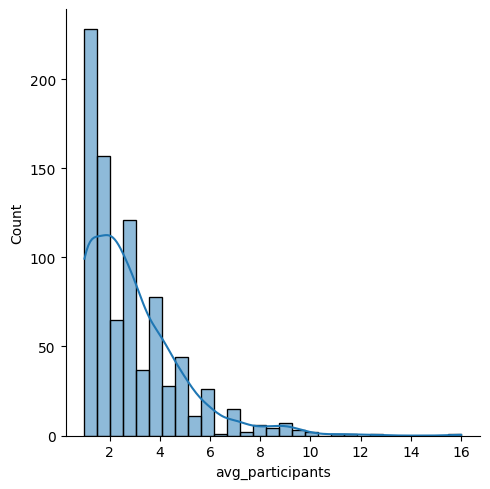

In [ ]:
columns_outliers=['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

for i in columns_outliers:
  sns.displot(df[i], kde=True)
  plt.show()

In [ ]:
for i in columns_outliers:
  print(df[i].skew())


0.19768834931739143
0.7725796592228346
2.3275901020883847
1.2169770006955862
1.7928624864504816
1.036617824294794
2.3258619471575734
1.3629513375303224
27.819299567666462
0.5846778923185426
1.7566113393008431


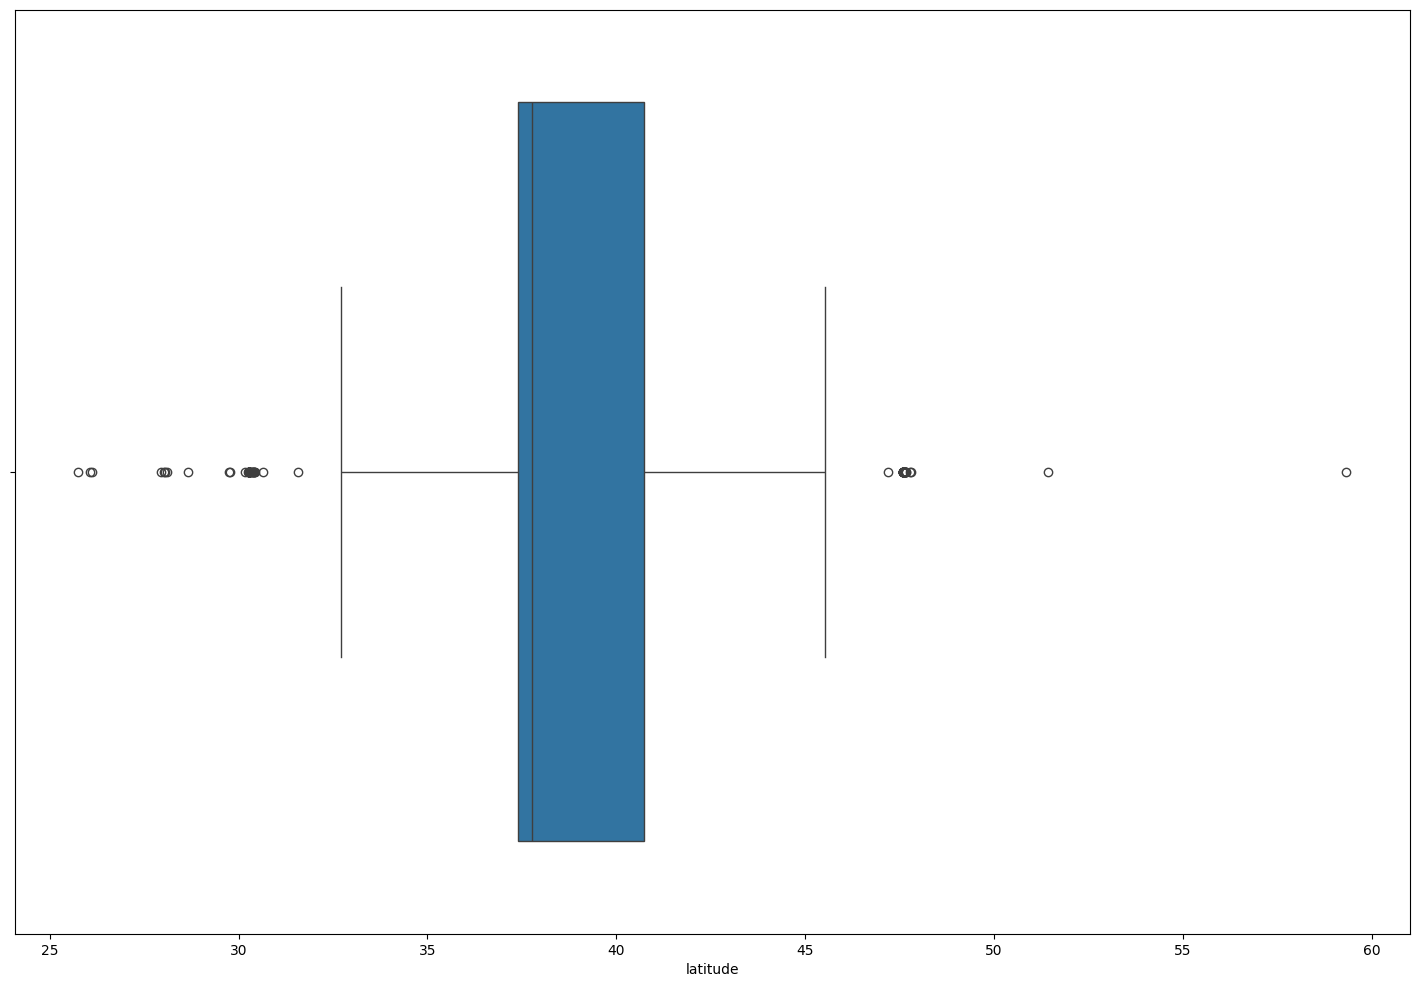

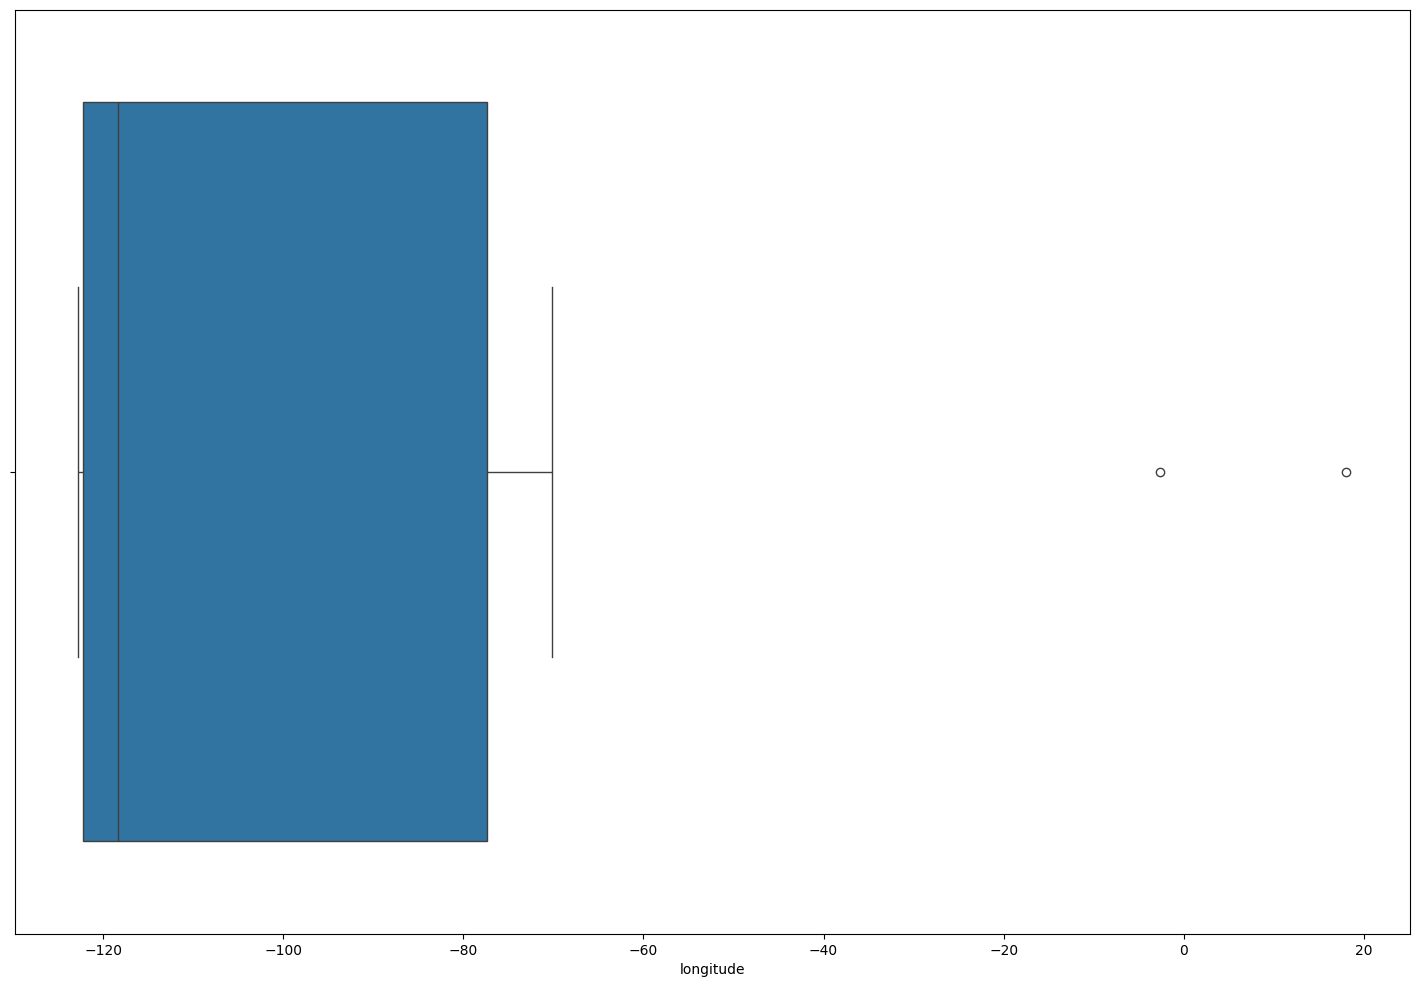

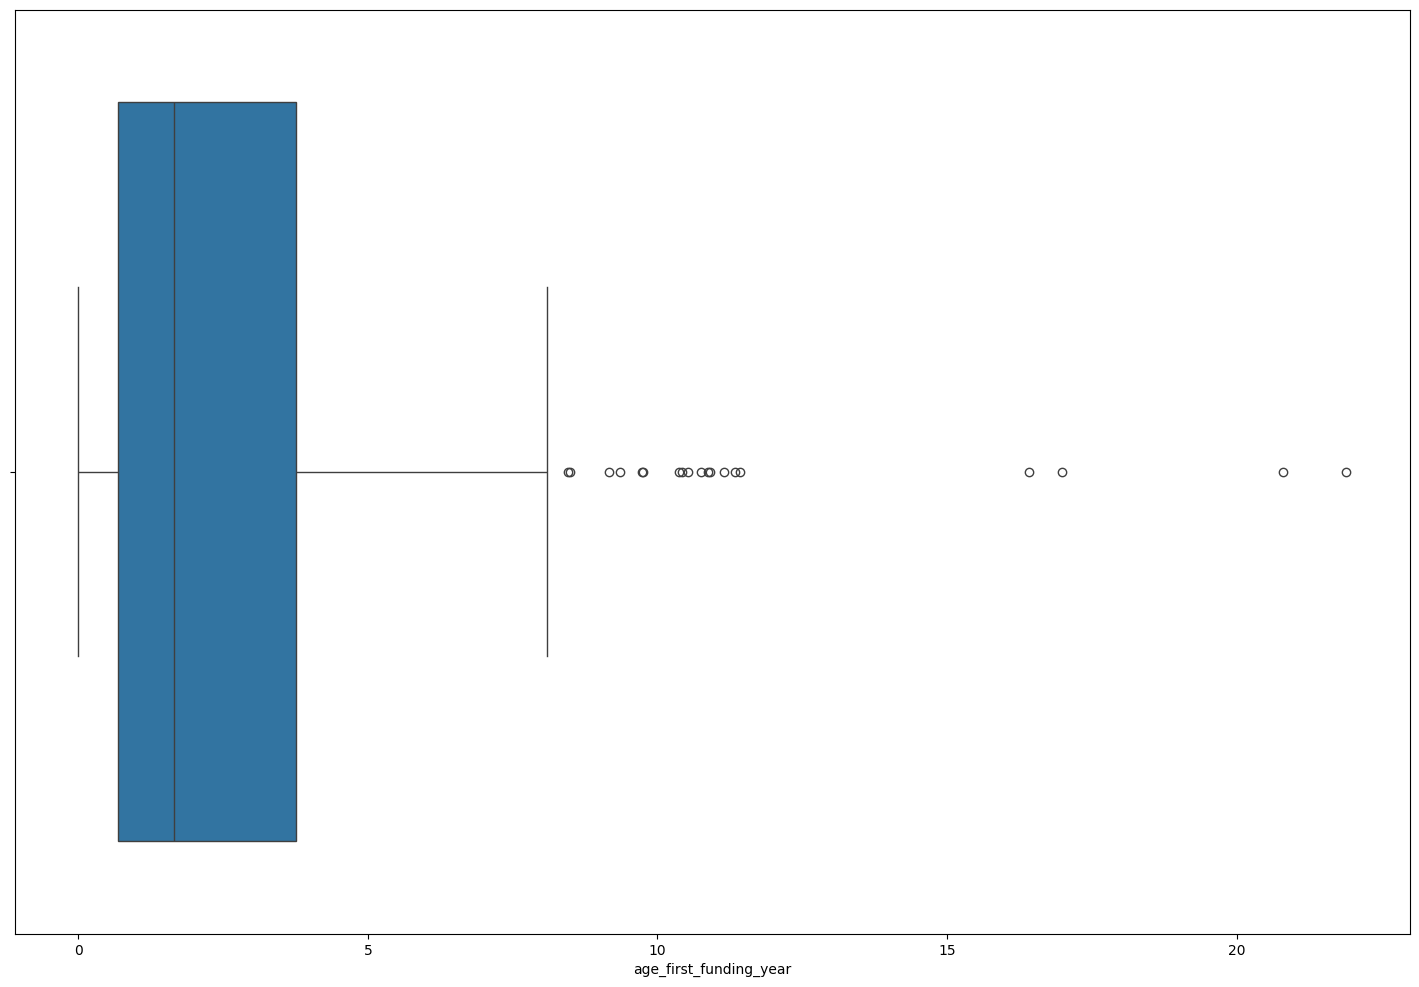

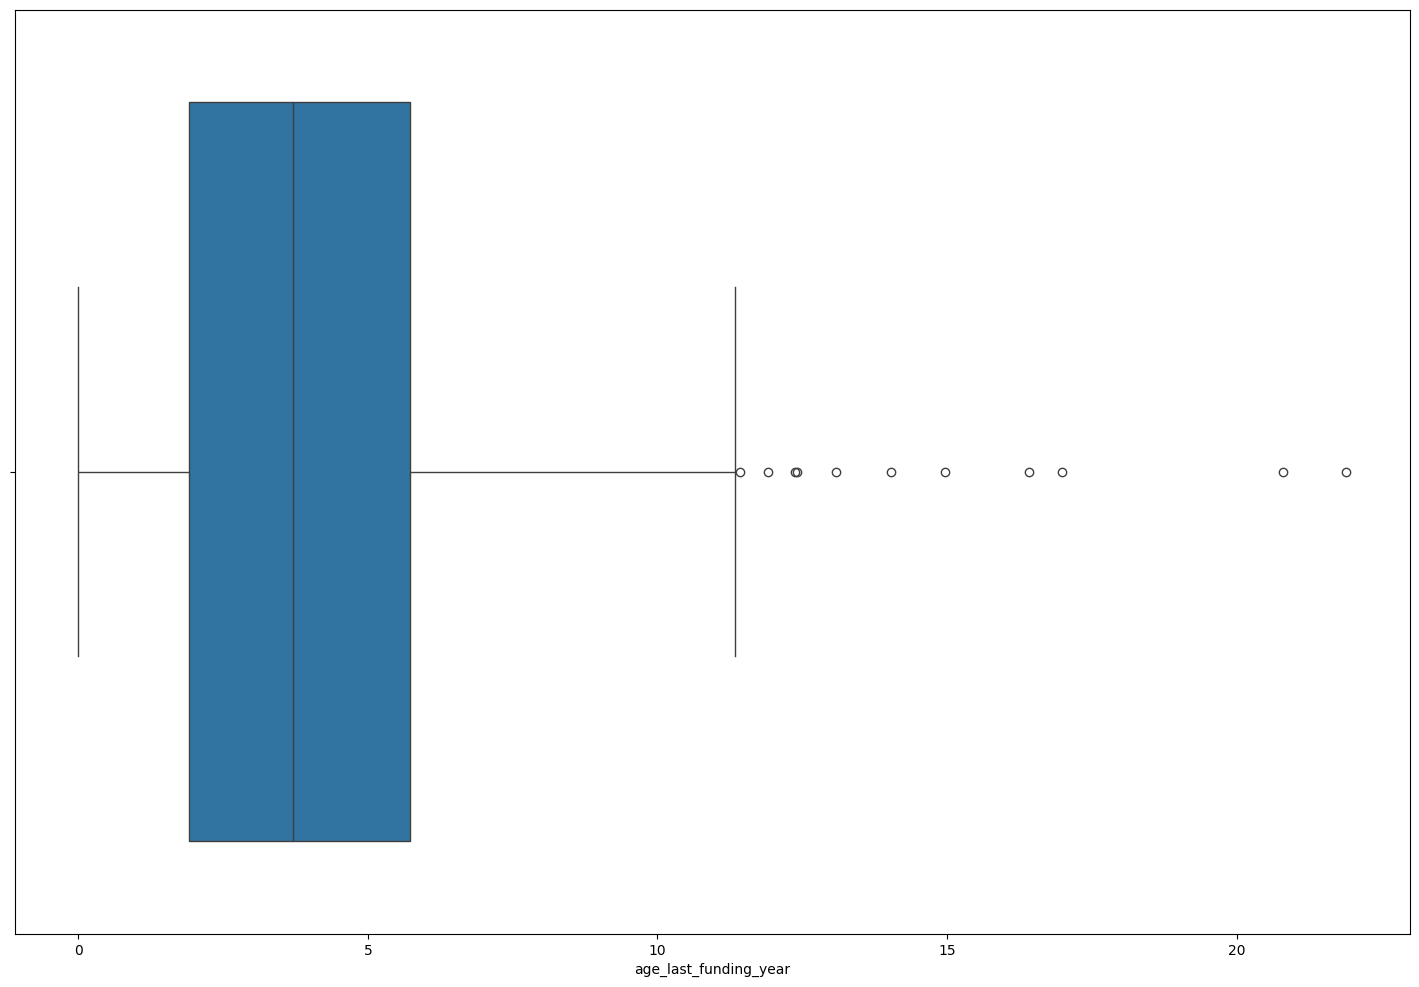

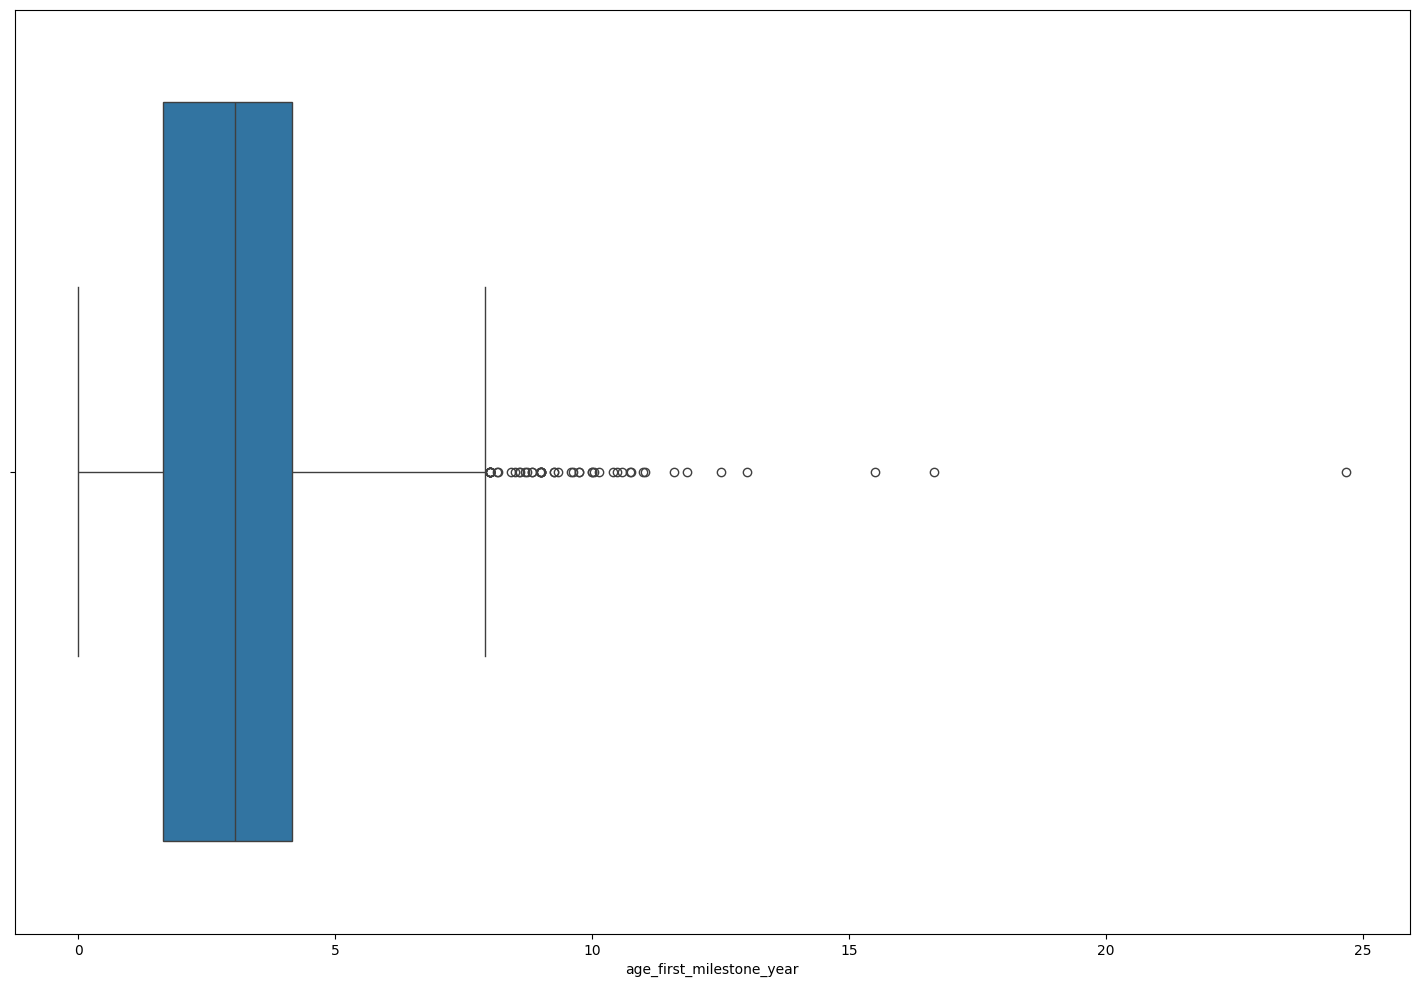

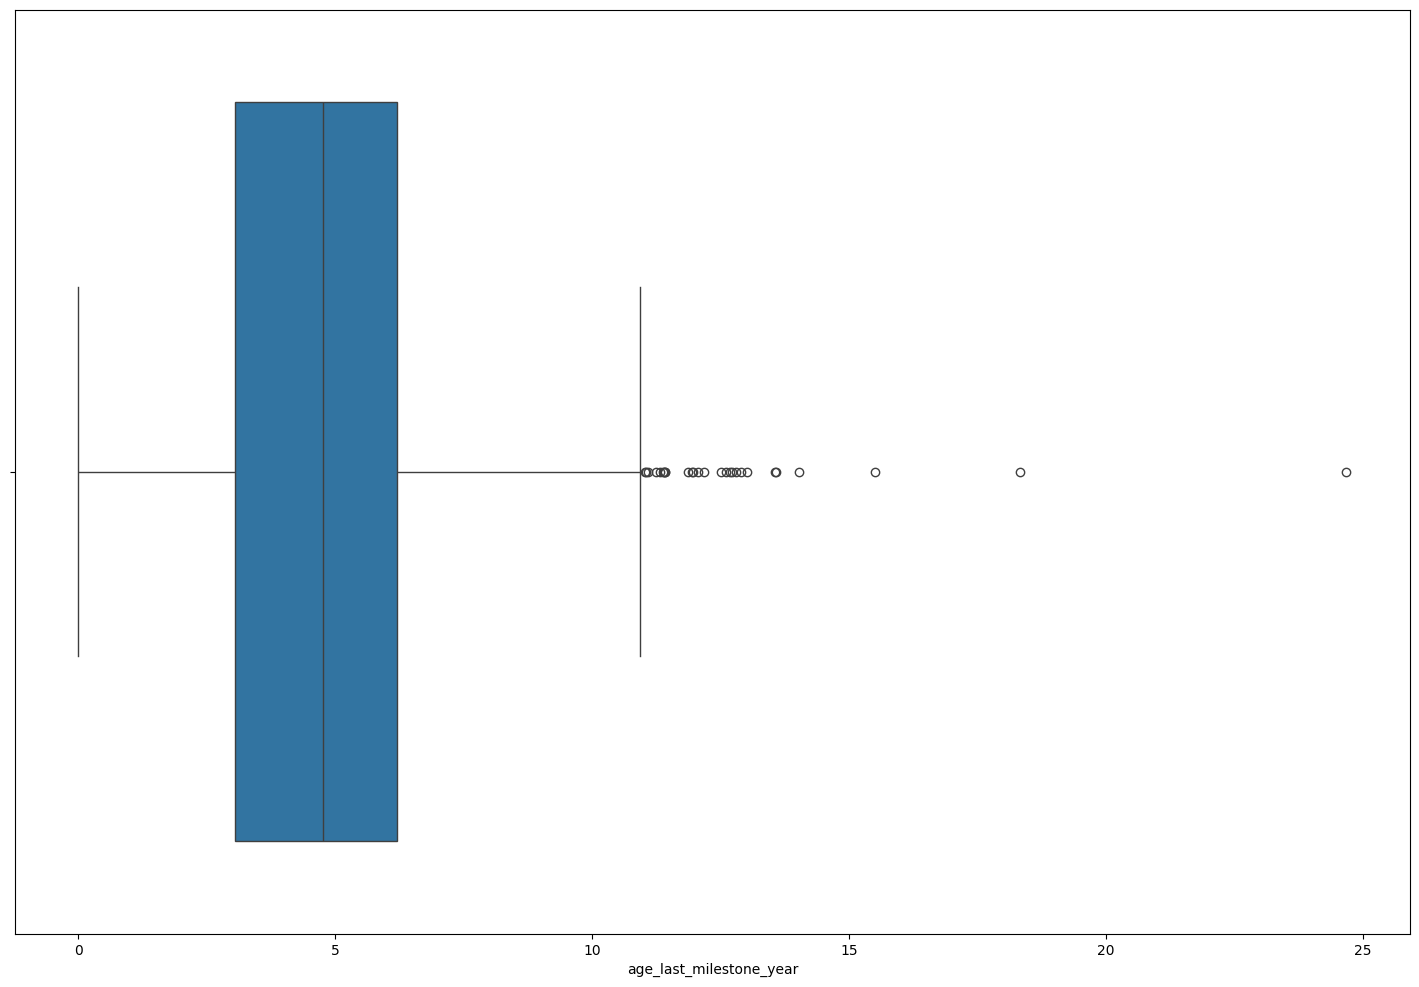

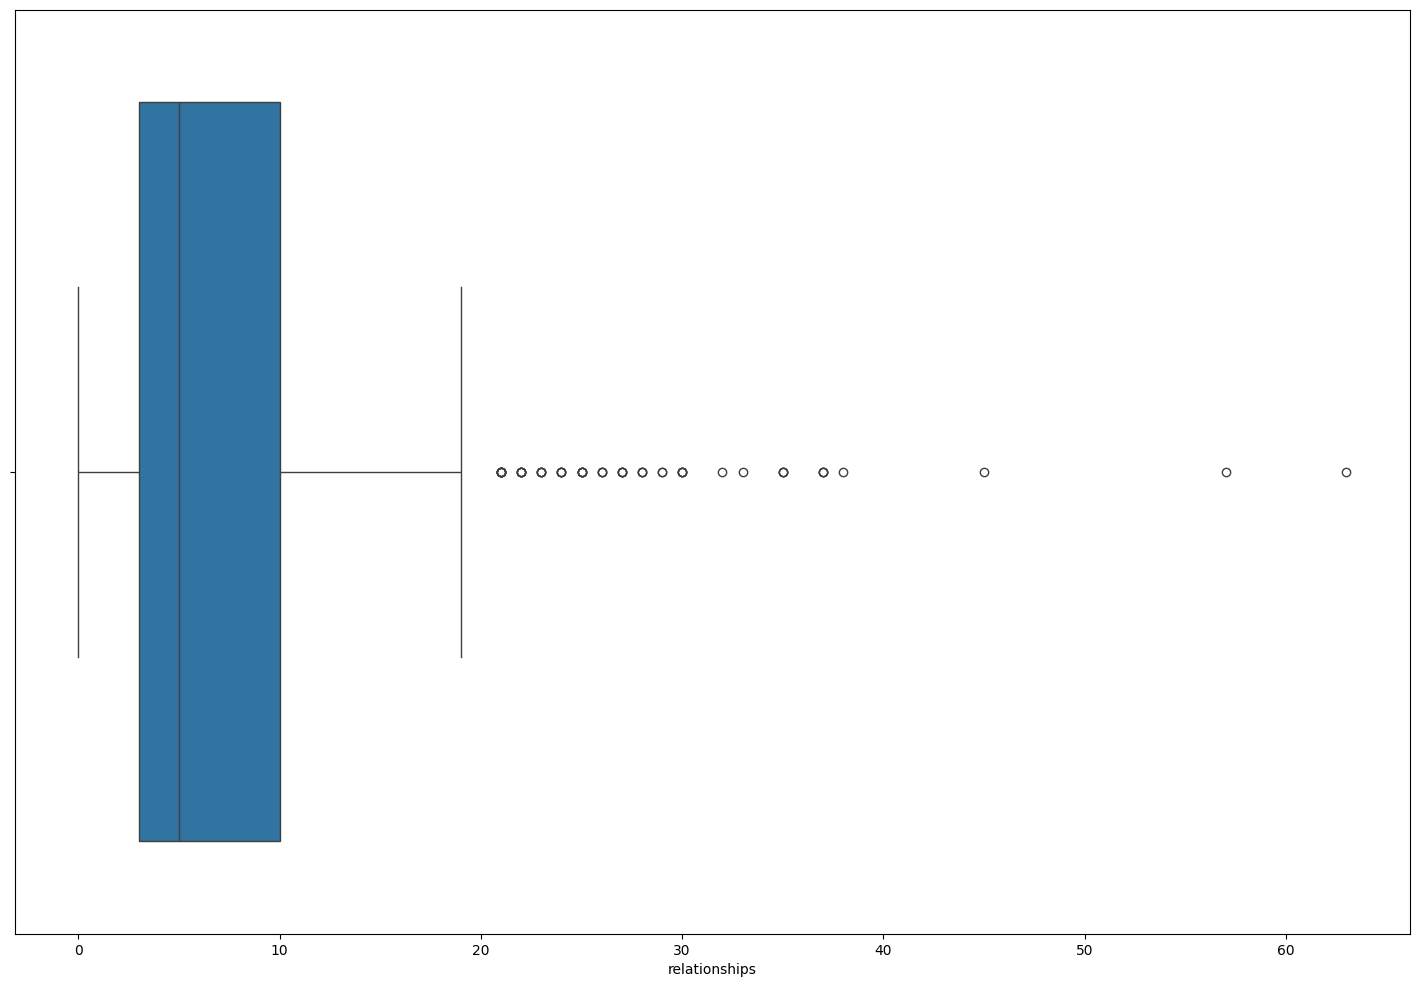

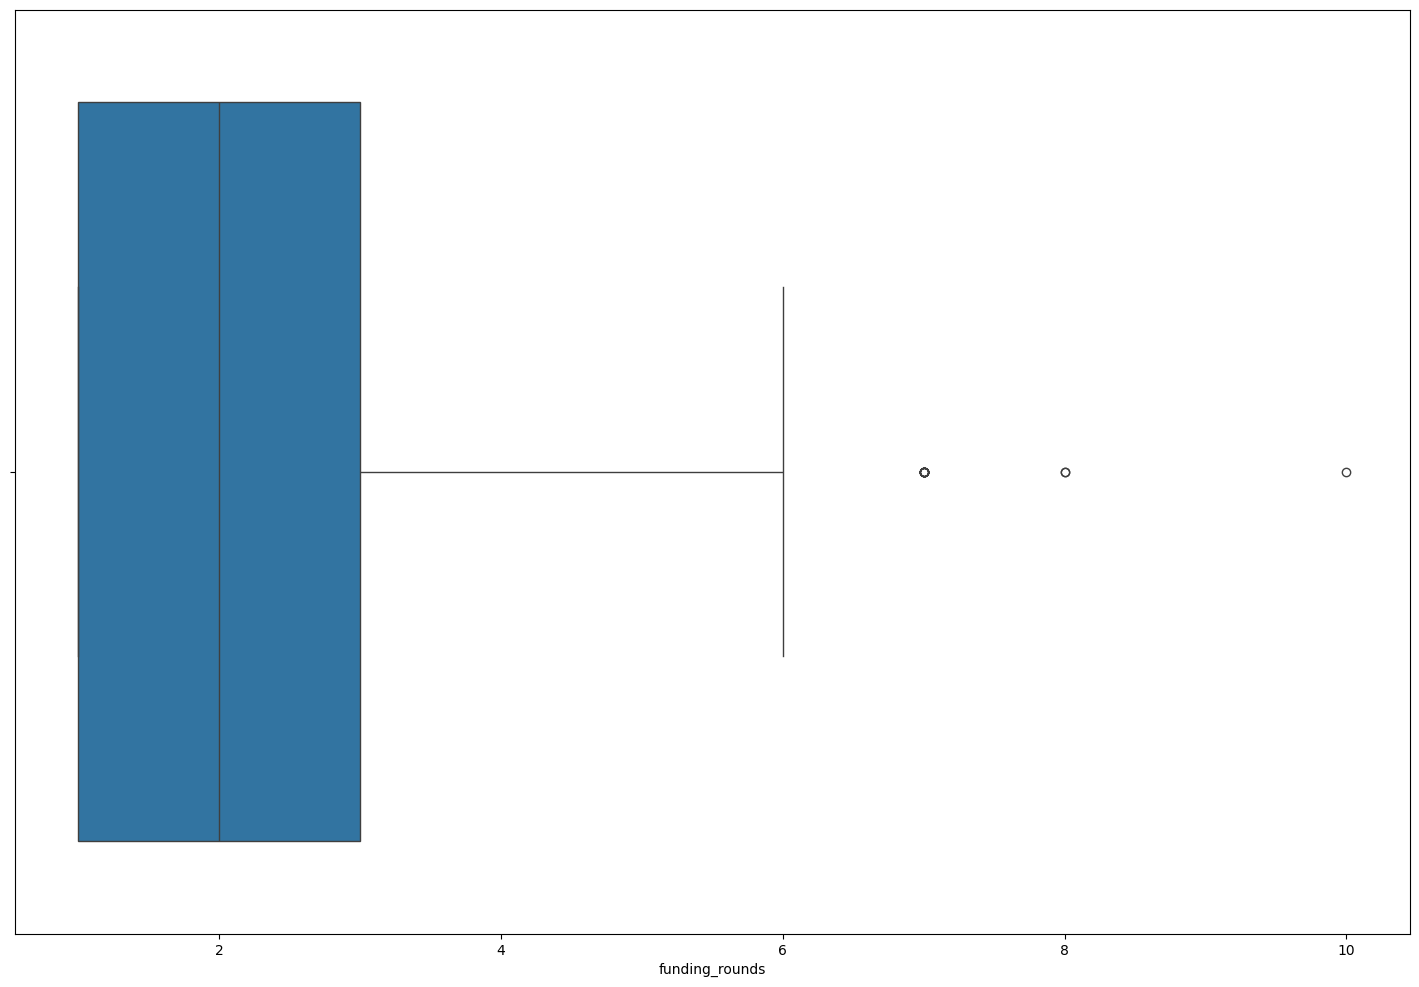

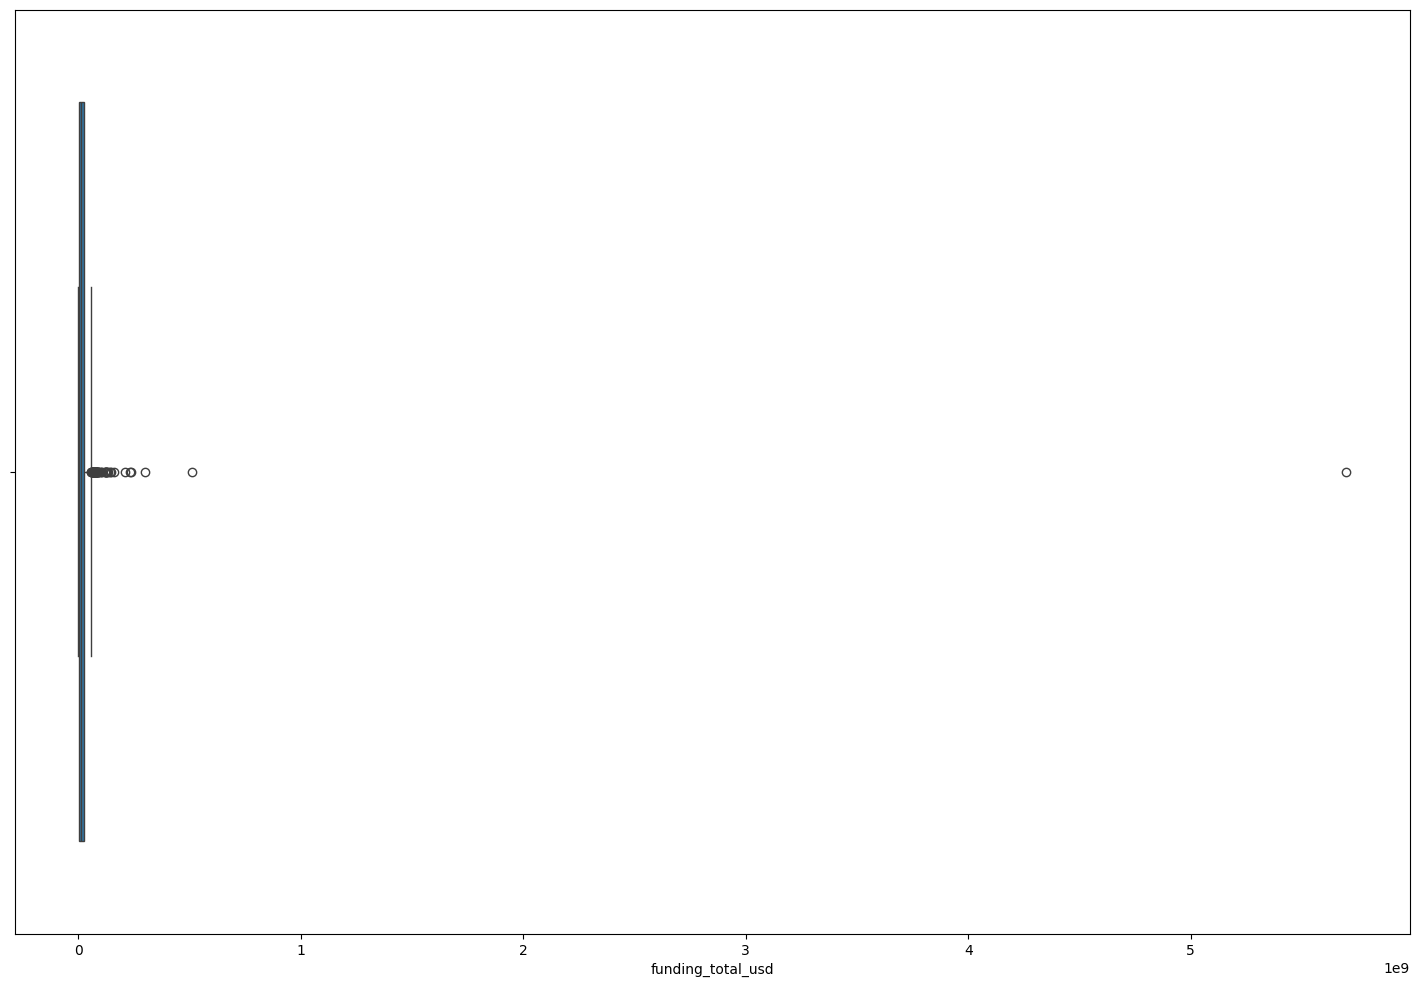

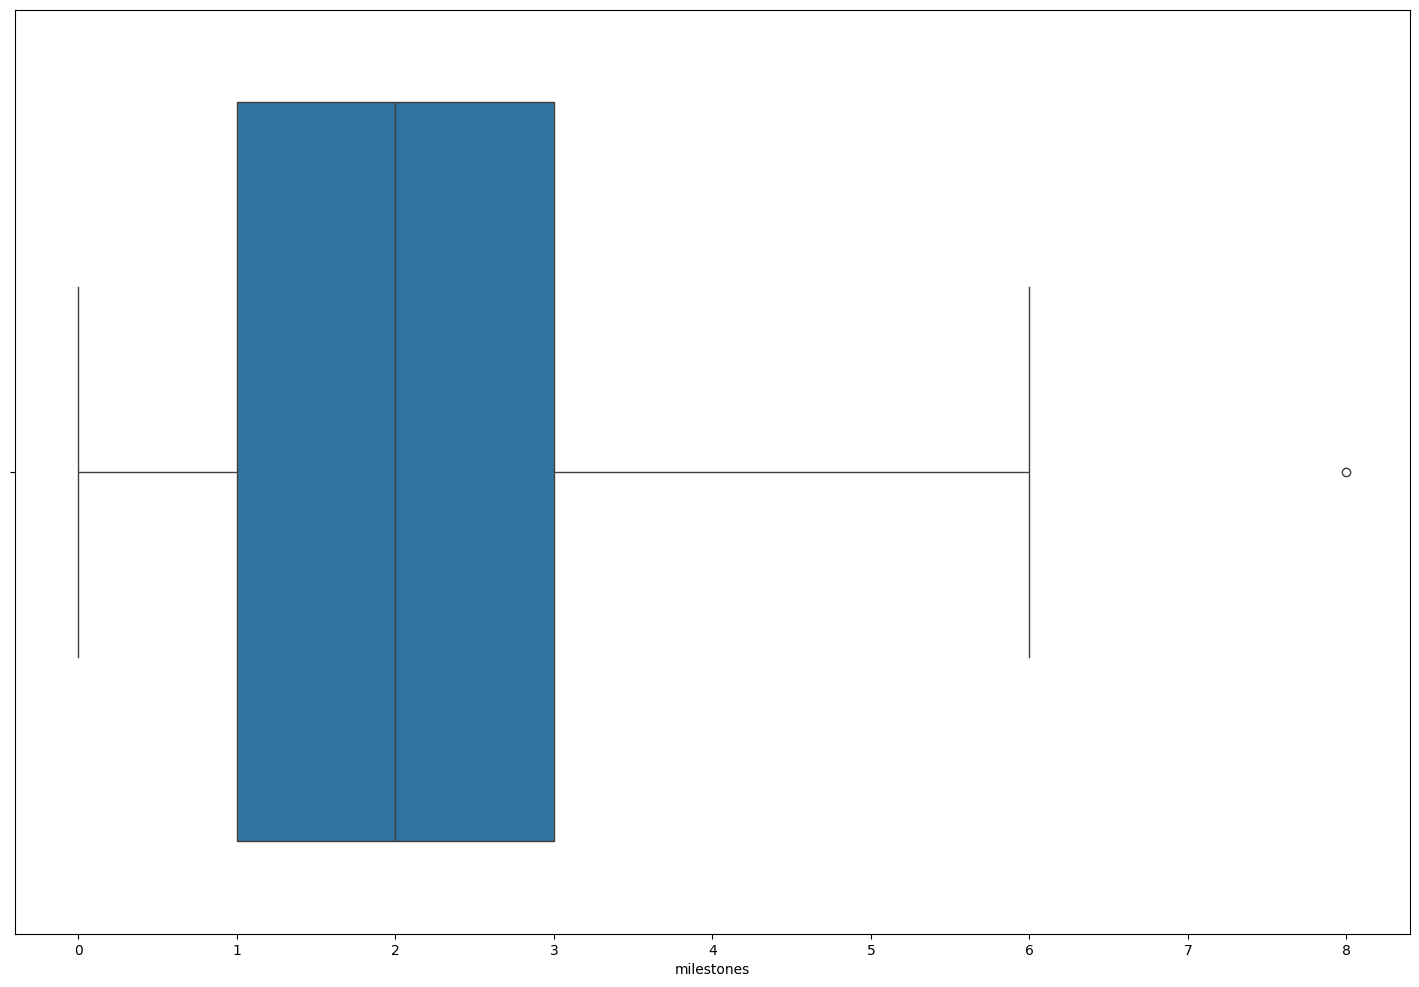

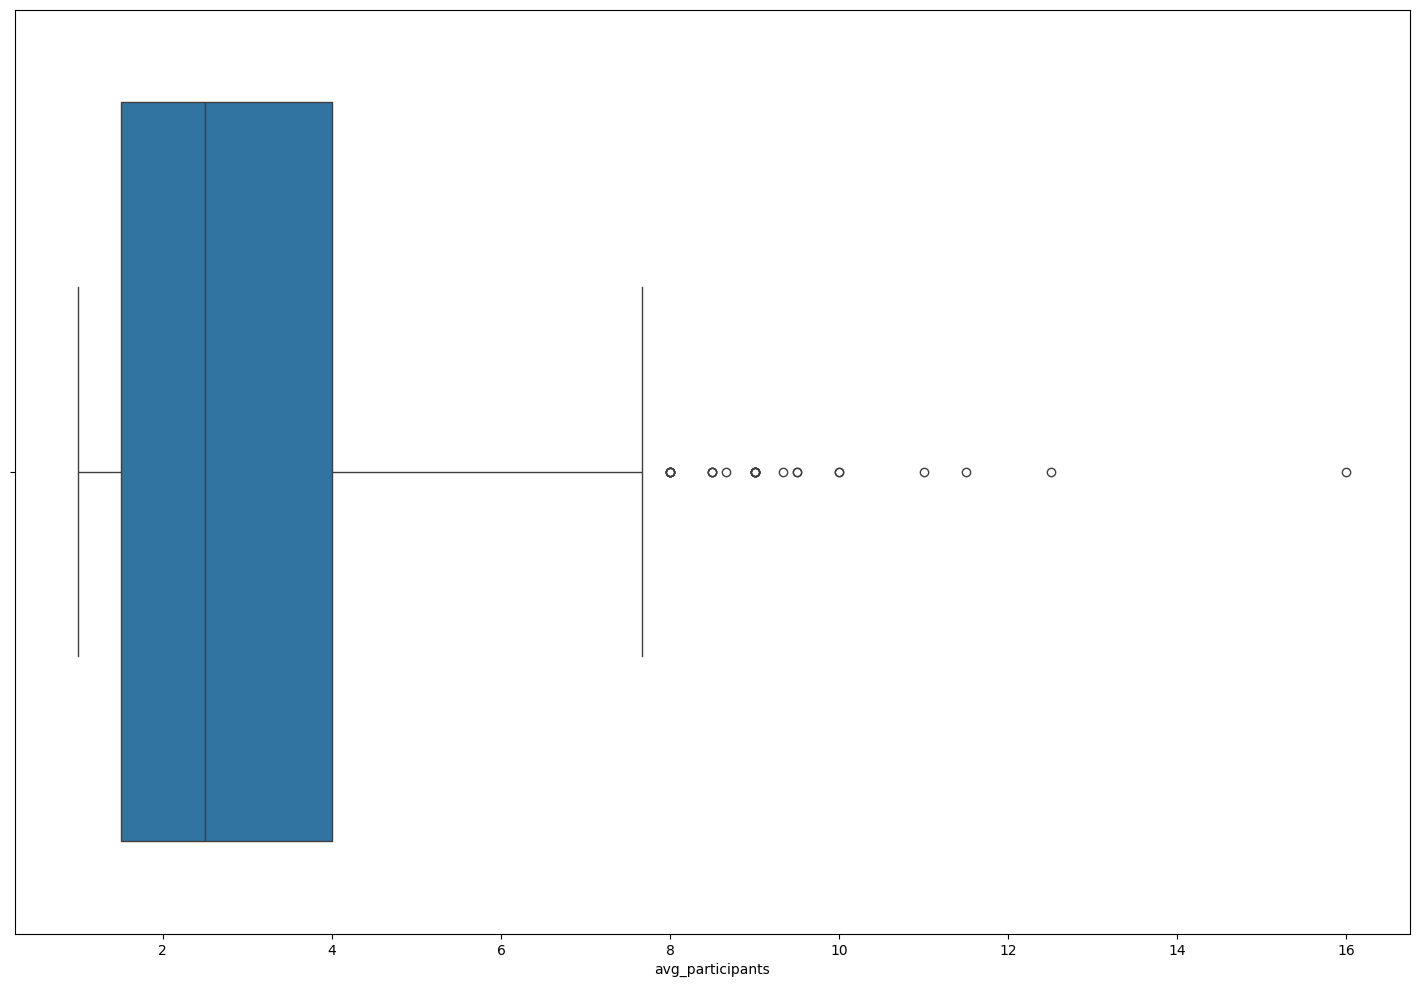

In [ ]:
for i in columns_outliers:
  plt.figure(figsize=(18,12))
  sns.boxplot(df[i],orient='h')
  plt.show()

In [ ]:
def remove_outliers(df, featuresNumfinal):
 for i in range(0, len(featuresNumfinal)):
   q1 = df[featuresNumfinal[i]].quantile(0.25)
   q3 = df[featuresNumfinal[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[featuresNumfinal[i]] >= lower_bound) &
                     (df[featuresNumfinal[i]] <= upper_bound)]
   return cleaned_data

featuresNumfinal=['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

new_df=remove_outliers(df,featuresNumfinal)
print(new_df.shape)

(770, 41)


In [ ]:
def remove_outliers(df, featuresNumfinal):
 for i in range(0, len(featuresNumfinal)):
   q1 = df[featuresNumfinal[i]].quantile(0.25)
   q3 = df[featuresNumfinal[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[featuresNumfinal[i]] >= lower_bound) &
                     (df[featuresNumfinal[i]] <= upper_bound)]
   return cleaned_data

featuresNumfinal=['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants']

new_df=remove_outliers(df,featuresNumfinal)
print(new_df.shape)

(770, 41)


In [ ]:
new_df



,state_code,latitude,longitude,zip_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,1/1/2009,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,1/1/1998,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,1/1/1999,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,1/1/2009,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1


In [ ]:
new_df.drop(['founded_at','first_funding_at','last_funding_at' ],axis=1, inplace=True)


In [ ]:
new_df.shape


(770, 38)

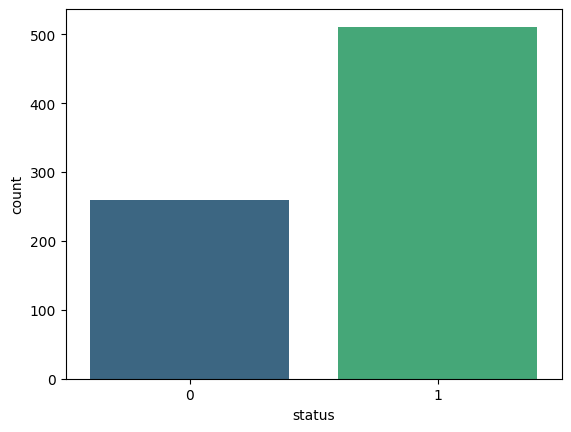

In [ ]:

sns.countplot(x = new_df['status'], palette = 'viridis')
plt.show()


<Axes: xlabel='status', ylabel='relationships'>

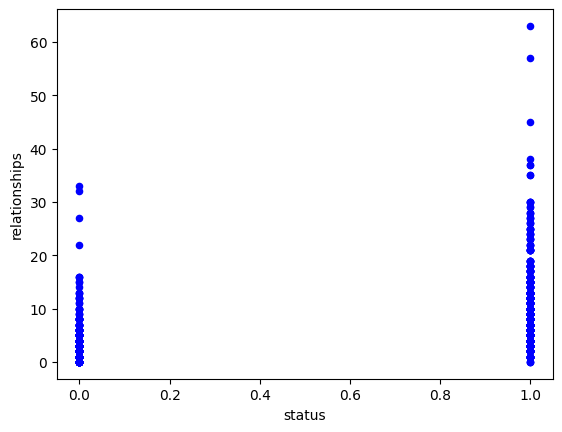

In [ ]:
new_df.plot(kind='scatter',x='status',y='relationships',color='blue')


<Axes: xlabel='status', ylabel='milestones'>

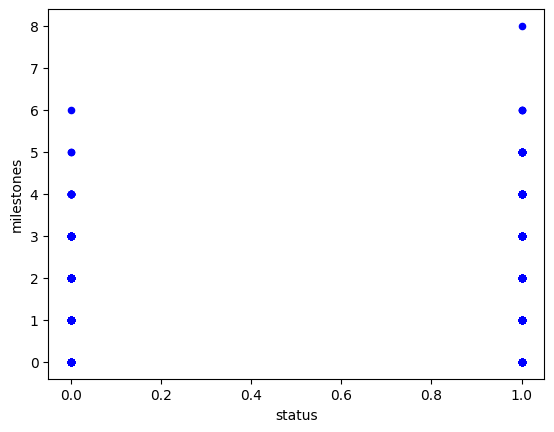

In [ ]:
new_df.plot(kind='scatter',x='status',y='milestones',color='blue')


<Axes: ylabel='Frequency'>

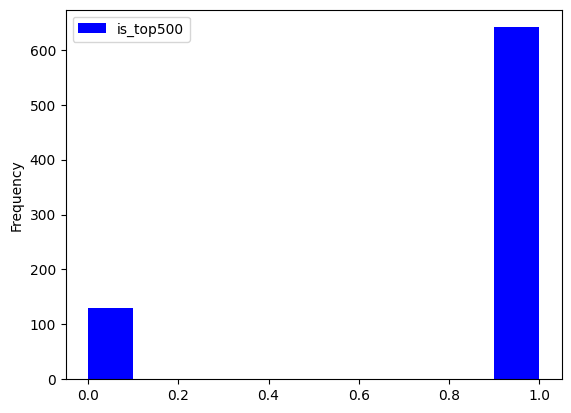

In [ ]:
new_df.plot(kind='hist',x='status',y='is_top500',color='blue')


<Axes: ylabel='Frequency'>

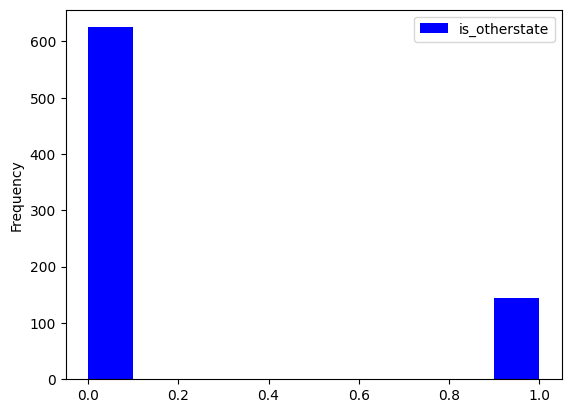

In [ ]:
new_df.plot(kind='hist',x='status',y='is_otherstate',color='blue')


In [ ]:
new_df.drop(['is_CA','is_NY',	'is_MA','is_TX','is_otherstate','is_software',
             'is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo',
             'is_ecommerce','is_biotech','is_consulting',
             'is_othercategory'],axis=1, inplace=True)

In [ ]:
print(new_df.shape)
print(new_df.nunique())
print(new_df.info())

(770, 23)
state_code                   33
latitude                    542
longitude                   541
zip_code                    320
city                        195
age_first_funding_year      539
age_last_funding_year       653
age_first_milestone_year    385
age_last_milestone_year     485
relationships                38
funding_rounds                9
funding_total_usd           439
milestones                    8
category_code                35
has_VC                        2
has_angel                     2
has_roundA                    2
has_roundB                    2
has_roundC                    2
has_roundD                    2
avg_participants             53
is_top500                     2
status                        2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 922
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                

In [ ]:
Le=LabelEncoder()
new_df['category_code']=Le.fit_transform(new_df['category_code'])
new_df['city']=Le.fit_transform(new_df['city'])
new_df['zip_code']=Le.fit_transform(new_df['zip_code'])
new_df['state_code']=Le.fit_transform(new_df['state_code'])
new_df[['state_code','zip_code','city','category_code']]

,state_code,zip_code,city,category_code
0,2,213,154,19
1,2,295,100,8
2,2,214,154,34
3,2,292,50,30
4,2,256,155,11
...,...,...,...,...
918,2,257,155,0
919,11,44,30,27
920,2,251,172,3
921,2,275,155,30


In [ ]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 922
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                770 non-null    int64  
 1   latitude                  770 non-null    float64
 2   longitude                 770 non-null    float64
 3   zip_code                  770 non-null    int64  
 4   city                      770 non-null    int64  
 5   age_first_funding_year    770 non-null    float64
 6   age_last_funding_year     770 non-null    float64
 7   age_first_milestone_year  770 non-null    float64
 8   age_last_milestone_year   770 non-null    float64
 9   relationships             770 non-null    int64  
 10  funding_rounds            770 non-null    int64  
 11  funding_total_usd         770 non-null    int64  
 12  milestones                770 non-null    int64  
 13  category_code             770 non-null    int64  
 14  has_VC         

In [ ]:

X=new_df.drop(['status'],axis=1)
y=new_df['status']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)


In [ ]:
x_train


,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
653,2,32.715400,-117.156500,215,154,0.3288,5.3726,9.005500,9.005500,9,3,35150000,1,34,0,0,1,1,1,0,3.0,1
681,22,40.757929,-73.985506,5,118,0.2466,2.5589,2.002700,4.778100,11,3,12800000,2,11,0,1,1,1,0,0,1.5,1
191,2,37.809338,-122.416606,262,155,0.7479,2.7507,1.583600,4.531500,5,2,3500000,2,11,0,0,1,1,0,0,3.0,1
505,2,37.563905,-122.324688,271,158,16.9863,16.9863,16.663000,18.323300,7,1,6000000,2,20,0,0,1,0,0,0,1.0,1
442,2,37.763652,-122.421778,261,155,0.1671,0.1671,0.671200,3.315100,4,1,500000,2,20,0,0,1,0,0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2,37.662431,-121.874679,281,141,3.1671,3.1671,3.055353,4.754423,4,1,12000000,0,11,0,0,0,0,1,0,5.0,1
862,19,40.707045,-74.956003,173,71,3.9726,10.2493,3.000000,3.000000,8,4,59000000,1,28,0,0,0,1,1,0,6.0,1
91,5,37.090240,-95.712891,62,184,1.1671,4.6658,3.055353,4.754423,1,3,15564591,0,0,1,0,0,1,1,0,3.5,1
282,2,37.779281,-122.419236,255,155,0.0000,5.0630,5.005500,5.794500,10,3,7600000,2,0,0,0,1,1,0,0,5.0,1


In [ ]:
x_test

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
338,22,40.756054,-73.986951,3,125,0.0000,3.9562,4.761600,5.150700,24,5,90000000,3,8,1,0,1,1,1,1,3.8000,1
124,2,37.548270,-121.988572,278,67,0.7562,4.4137,2.783600,4.002700,14,4,34250000,2,4,1,0,1,1,1,0,2.2500,1
914,22,40.750519,-73.993494,3,125,3.2137,3.2137,3.002700,4.621900,5,1,2700000,2,11,0,0,1,0,0,0,2.0000,1
419,11,42.528635,-71.278022,47,20,4.3315,11.1699,8.704100,8.706800,3,4,135826373,2,22,0,0,0,1,0,1,4.3333,1
482,11,42.360253,-71.058291,71,23,2.0849,4.0192,2.504100,2.504100,5,5,1178000,1,30,0,1,0,0,0,0,5.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2,37.419240,-122.208414,235,109,0.2055,0.2055,0.164400,0.164400,1,1,1500000,1,11,0,0,1,0,0,0,1.0000,1
621,11,42.471720,-71.262144,88,91,5.6438,5.6438,8.005500,11.328800,9,1,12700000,2,24,0,0,0,0,0,1,4.0000,1
184,22,40.728425,-73.999882,11,125,0.6192,1.5863,3.055353,4.754423,2,2,890000,0,18,0,1,0,0,0,0,3.0000,1
415,2,37.780716,-122.393913,257,155,0.0000,1.2466,1.000000,5.438400,4,2,3100000,4,11,0,1,1,0,0,0,2.0000,1


In [ ]:
y_train


,status
653,1
681,1
191,1
505,0
442,1
...,...
767,1
862,1
91,0
282,1


In [ ]:
y_test

,status
338,1
124,1
914,1
419,1
482,1
...,...
676,0
621,1
184,0
415,1


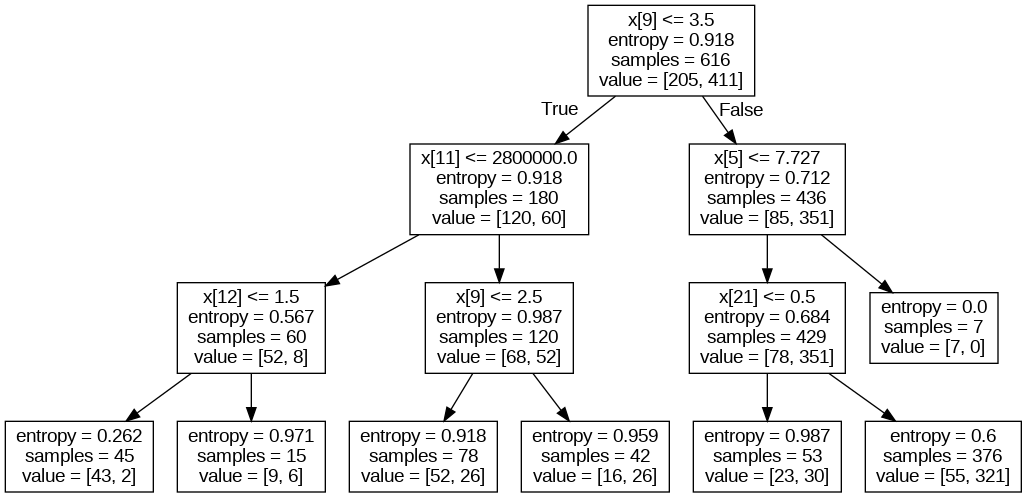

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3)
decision_tree = decision_tree.fit(x_train,y_train)
dot_data = export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data)
image = graph.render(format='png')
display(Image(image))


In [ ]:
y_pred = decision_tree.predict(x_test)
y_test==y_pred

,status
338,True
124,True
914,True
419,True
482,True
...,...
676,True
621,True
184,True
415,True


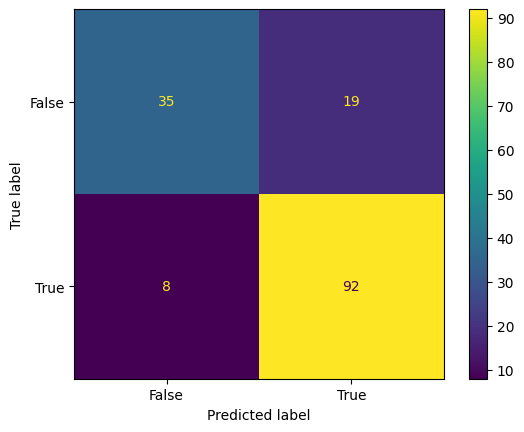

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', accuracy*100)
report = classification_report(y_test, y_pred)
print(' Decision Tree Classification report:\n', report)

Decision Tree Accuracy: 82.46753246753246
 Decision Tree Classification report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72        54
           1       0.83      0.92      0.87       100

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.82      0.82      0.82       154



In [ ]:

data = pd.DataFrame({
    'state_code':22,	'latitude':40.756054, 'longitude':-73.986951,
    'zip_code':3,	'city':125,	'age_first_funding_year':0.0000,
    'age_last_funding_year':3.9562,	'age_first_milestone_year':4.7616,
    'age_last_milestone_year':5.1507,	'relationships':24,	'funding_rounds':5,
    'funding_total_usd':90000000,	'milestones':3,	'category_code':8,
    'has_VC':1,	'has_angel':0,	'has_roundA':1,	'has_roundB':1,	'has_roundC':1,
    'has_roundD':1,	'avg_participants':3.8000,	'is_top500':1
},index=[0])
data

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,22,40.756054,-73.986951,3,125,0.0,3.9562,4.7616,5.1507,24,5,90000000,3,8,1,0,1,1,1,1,3.8,1


In [ ]:
prediction=decision_tree.predict(data)
if prediction[0]==1:
  print("The prediction indicates the startup will be successful")
else:
  print("The prediction indicates the startup will not be successful")

The prediction indicates the startup will be successful


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error



In [ ]:

random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1, max_depth=3)
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=1)

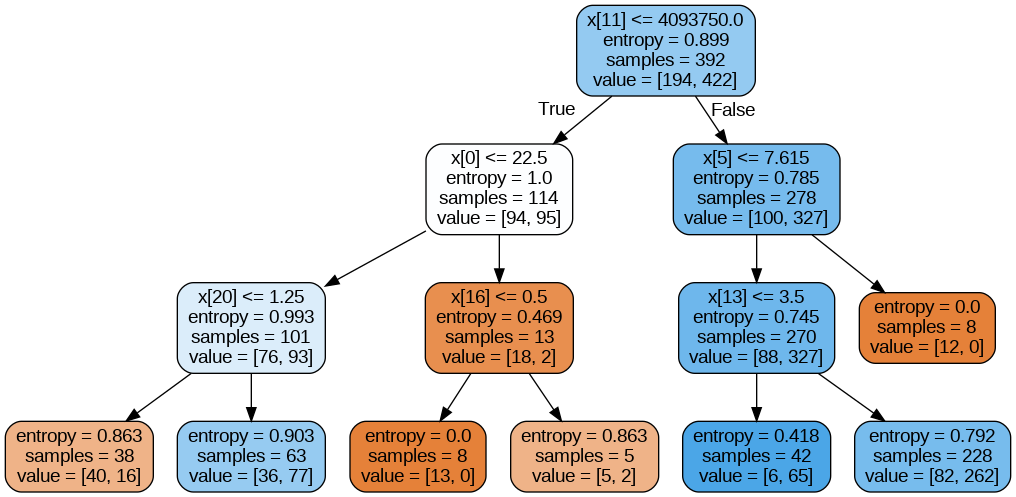

In [ ]:
import graphviz
from IPython.display import Image, display


tree = random_forest.estimators_[0]

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
image = graph.render(format='png')

display(Image(image))



In [ ]:

y_predr = random_forest.predict(x_test)
y_predr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

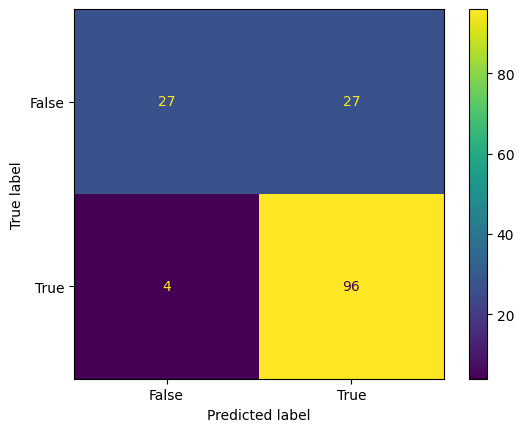

In [ ]:
confusion_matrixr = metrics.confusion_matrix(y_test,y_predr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixr, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:

accuracyR = accuracy_score(y_test, y_predr)
accuracyR

0.7987012987012987

In [ ]:
print('Random Forest Accuracy:', accuracyR*100)
report = classification_report(y_test, y_predr)
print(' Random Forest Classification report:\n', report)


Random Forest Accuracy: 79.87012987012987
 Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.87      0.50      0.64        54
           1       0.78      0.96      0.86       100

    accuracy                           0.80       154
   macro avg       0.83      0.73      0.75       154
weighted avg       0.81      0.80      0.78       154



In [ ]:
data = pd.DataFrame({
    'state_code':22,	'latitude':40.756054, 'longitude':-73.986951,
    'zip_code':3,	'city':125,	'age_first_funding_year':0.0000,
    'age_last_funding_year':3.9562,	'age_first_milestone_year':4.7616,
    'age_last_milestone_year':5.1507,	'relationships':24,	'funding_rounds':5,
    'funding_total_usd':90000000,	'milestones':3,	'category_code':8,
    'has_VC':1,	'has_angel':0,	'has_roundA':1,	'has_roundB':1,	'has_roundC':1,
    'has_roundD':1,	'avg_participants':3.8000,	'is_top500':1
},index=[0])
data

,state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,22,40.756054,-73.986951,3,125,0.0,3.9562,4.7616,5.1507,24,5,90000000,3,8,1,0,1,1,1,1,3.8,1


In [ ]:
prediction=random_forest.predict(data)
if prediction[0]==1:
  print("The prediction indicates the startup will be successful")
else:
  print("The prediction indicates the startup will not be successful")

The prediction indicates the startup will be successful


In [ ]:
prediction=random_forest.predict(data)
if prediction[0]==1:
  print("The prediction indicates the startup will be successful")
else:
  print("The prediction indicates the startup will not be successful")

The prediction indicates the startup will be successful


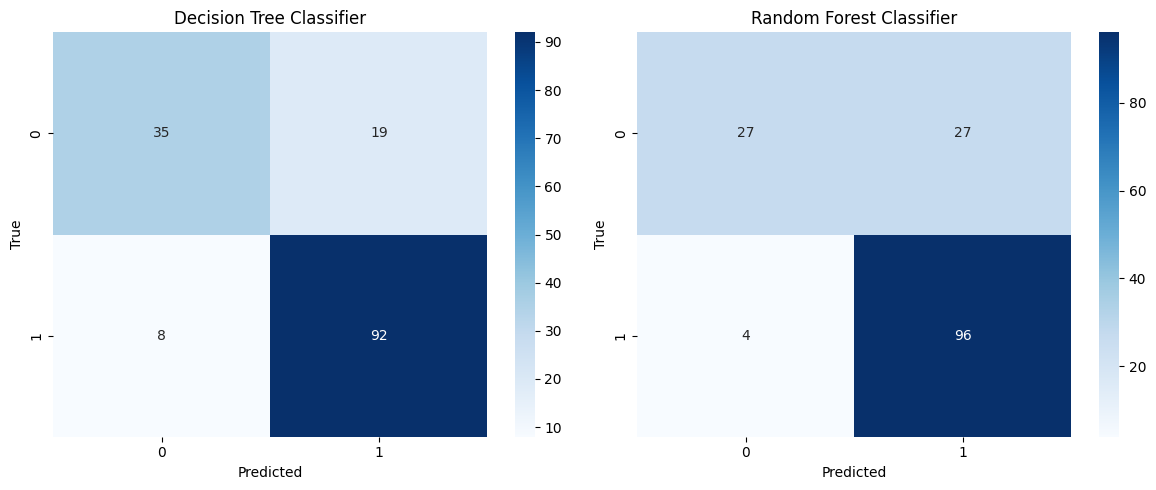

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Classifier")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrixr, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest Classifier")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


In [ ]:
import pickle


In [ ]:
with open("decisiontree.pkl", "wb") as f:
  pickle.dump(decision_tree, f)

In [ ]:
with open("decisiontree.pkl", "rb") as f:
	clf  = pickle.load(f)


In [ ]:
clf


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [ ]:

def make_prediction(state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships
                             ,funding_rounds,funding_total_usd,milestones,category_code,has_VC
                             ,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500):
    with open("decisiontree.pkl", "rb") as f:
        clf  = pickle.load(f)
        preds = clf.predict([[state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships
                             ,funding_rounds,funding_total_usd,milestones,category_code,has_VC
                             ,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500]])

        if preds == 1:
          return "Your startup is likely to be successful..."
        return "Your startup is not likely to be successful"



#Create the input component for Gradio since we are expecting 4 inputs

state_code=gr.Number(label="Enter state code")
latitude=gr.Number(label="Enter latitude")
longitude=gr.Number(label="Enter longitude")
zip_code=gr.Number(label="Enter zip_code")
city=gr.Number(label="Enter city")
age_first_funding_year=gr.Number(label="Enter age_first_funding_year")
age_last_funding_year=gr.Number(label="Enter age_last_funding_year")
age_first_milestone_year=gr.Number(label="Enter age_first_milestone_year")
age_last_milestone_year=gr.Number(label="Enter age_last_milestone_year")
relationships=gr.Number(label="Enter relationships")
funding_rounds=gr.Number(label="Enter funding_rounds")

funding_total_usd=gr.Number(label="Enter funding_total_usd")
milestones=gr.Number(label="Enter milestones")
category_code=gr.Number(label="Enter category_code")
has_VC=gr.Number(label="Enter has_VC")
has_angel=gr.Number(label="Enter has_angel")
has_roundA=gr.Number(label="Enter has_roundA")
has_roundB=gr.Number(label="Enter has_roundB")
has_roundC=gr.Number(label="Enter has_roundC")
has_roundD=gr.Number(label="Enter has_roundD")
avg_participants=gr.Number(label="Enter avg_participants")
is_top500=gr.Number(label="Enter is_top500")


# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[state_code,latitude,longitude,zip_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships
                             ,funding_rounds,funding_total_usd,milestones,category_code,has_VC
                             ,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500], outputs=output)
app.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://826102d8a1773edae7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
